В этом дз необходимо обучить модели для классификации. Cегодня попробуем отличать настоящие новости от фейковых


#### Decision Trees и Boosting показали лучший результат.


In [1]:
# ячейка импортов

import numpy as np
import pandas as pd

# импорт моделей
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report # табличка с метриками

import matplotlib.pyplot as plt
from collections import Counter

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline 

# Exploratory Data Analysis (EDA)



In [ ]:
! unzip "news_fake-n-true.csv.zip"

Archive:  news_fake-n-true.csv.zip
replace news_fake-n-true.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
data = pd.read_csv("news_fake-n-true.csv")
data.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


**колонка label отвечает за тип новости: настоящие имеют лейбл 1,  фейковые новости -- с лейблом 0** 

In [ ]:
# создадим новый датафрейм из старого

data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)

display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

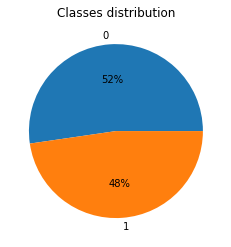

In [ ]:
classes =pd.value_counts(data_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

**давайте попробуем предсказать:** окажется ли текст настоящей новостью или фейковой

- Векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку

Попробуйте обучить разные модели для классификации на данных
1. Naive Bayes
2. SVM 
3. Decision Trees
4. Random Forest
5. Boosting

Для каждой модели посмотрите на метрики с помощью функции [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Какая/какие модель/ли справляются с задачей наиболее эффективно?

Векторизуем

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["text"])

display(X.shape)
display(X.toarray())

(44898, 121690)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Делим на обучающую и тренировочную выборки

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], 
                                                                    test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)
# sum(y_test == 1)

(35918, 121690) (8980, 121690)


### 1. Naive Bayes

In [ ]:
list_alpha = np.arange(1/100000, 20, 0.11) 
#возьмем лист равномерно распределенных значений от 1/100000 до 20(можно выбрать другие числа,эти были выбраны экспериментально)


score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [ ]:
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    # score_train? 
    
    score_test[count]= bayes.score(X_test, y_test)
    # score_test ? 
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.978534,0.960690,0.947677,0.968817
1,0.11001,0.964419,0.958018,0.953778,0.957597
2,0.22001,0.962804,0.957906,0.954012,0.957156
3,0.33001,0.961858,0.957461,0.953778,0.956471
4,0.44001,0.961022,0.956793,0.953778,0.955122
5,0.55001,0.960187,0.956347,0.953543,0.954439
6,0.66001,0.959575,0.955679,0.953074,0.953521
7,0.77001,0.959101,0.955345,0.953074,0.952850
8,0.88001,0.958823,0.955011,0.953308,0.951968
9,0.99001,0.958544,0.954120,0.952604,0.950820


(182, 5)

In [ ]:
best_index = models['Test Precision'].idxmax()
best_index

# display(best_index)

display(models.iloc[best_index])

alpha             0.000010
Train Accuracy    0.978534
Test Accuracy     0.960690
Test Recall       0.947677
Test Precision    0.968817
Name: 0, dtype: float64

In [ ]:
models[models['Test Recall']>0.9].sort_values(by="Test Precision", ascending = False)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.978534,0.960690,0.947677,0.968817
1,0.11001,0.964419,0.958018,0.953778,0.957597
2,0.22001,0.962804,0.957906,0.954012,0.957156
3,0.33001,0.961858,0.957461,0.953778,0.956471
4,0.44001,0.961022,0.956793,0.953778,0.955122
...,...,...,...,...,...
59,6.49001,0.952781,0.949666,0.949085,0.945093
63,6.93001,0.952586,0.949555,0.948850,0.945081
62,6.82001,0.952614,0.949555,0.948850,0.945081
45,4.95001,0.953644,0.950111,0.950258,0.944937


In [ ]:
models[models['Test Recall']>0.9].sort_values(by="Test Precision", ascending = False)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.978534,0.960690,0.947677,0.968817
1,0.11001,0.964419,0.958018,0.953778,0.957597
2,0.22001,0.962804,0.957906,0.954012,0.957156
3,0.33001,0.961858,0.957461,0.953778,0.956471
4,0.44001,0.961022,0.956793,0.953778,0.955122
...,...,...,...,...,...
59,6.49001,0.952781,0.949666,0.949085,0.945093
63,6.93001,0.952586,0.949555,0.948850,0.945081
62,6.82001,0.952614,0.949555,0.948850,0.945081
45,4.95001,0.953644,0.950111,0.950258,0.944937


In [ ]:
best_index = models[models['Test Precision']>0.95]['Test Accuracy'].idxmax()

models.iloc[best_index]

alpha             0.000010
Train Accuracy    0.978534
Test Accuracy     0.960690
Test Recall       0.947677
Test Precision    0.968817
Name: 0, dtype: float64

In [ ]:
bayes = naive_bayes.MultinomialNB(alpha= 0.000010) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,label,predicted
18322,0,0
6805,0,0
11776,0,0
43603,1,1
1166,1,1
...,...,...
3814,0,0
27520,1,1
11071,0,1
2479,0,0


In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))


pd.DataFrame(data = m_confusion_test, columns = ['Предсказанные новости', 'Предсказанныее фейки'],
            index = ['Реальные новости', 'Реальные фейки'])

,Предсказанные новости,Предсказанныее фейки
Реальные новости,4588,130
Реальные фейки,223,4039


Classification report

In [ ]:
print(classification_report(y_test, bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4718
           1       0.97      0.95      0.96      4262

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



### 2. SVM

Работает ооооочень медленно

In [2]:
import pandas as pd
data = pd.read_csv("news_fake-n-true.csv")
data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)
display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(data_clean['text'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, data["label"], test_size=0.3, random_state=25)

In [6]:
list_C = np.arange(500, 700, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C, verbose = 5)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

[LibSVM][LibSVM]

In [7]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.999968,0.991982,0.992942,0.990147
1,600.0,0.999968,0.991982,0.992942,0.990147


In [8]:
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

C                 500.000000
Train Accuracy      0.999968
Test Accuracy       0.991982
Test Recall         0.992942
Test Precision      0.990147
Name: 0, dtype: float64

In [9]:
# посмотрим на модели с почти 100% Precision

models[models['Test Precision']>0.99].head(5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.999968,0.991982,0.992942,0.990147
1,600.0,0.999968,0.991982,0.992942,0.990147


In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

### 3. Decision Trees

In [ ]:
data = pd.read_csv("news_fake-n-true.csv")
data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)
display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(data_clean['text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, data["label"], test_size=0.3, random_state=25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7094
           1       1.00      0.99      0.99      6376

    accuracy                           1.00     13470
   macro avg       1.00      0.99      1.00     13470
weighted avg       1.00      1.00      1.00     13470



### 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=500, verbose=1)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
print(classification_report(y_test, forest_y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7094
           1       0.99      0.99      0.99      6376

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.2s finished


### 5. Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=1000, n_iter_no_change=15, random_state=10, verbose=1)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, gb_y_pred))

      Iter       Train Loss   Remaining Time 
         1           1.1982           39.97m
         2           1.0457           39.33m
         3           0.9187           39.24m
         4           0.8115           39.14m
         5           0.7200           39.08m
         6           0.6412           39.00m
         7           0.5731           38.92m
         8           0.5134           38.87m
         9           0.4612           38.84m
        10           0.4155           38.75m
        20           0.1651           38.10m
        30           0.0831           37.64m
        40           0.0525           37.35m
        50           0.0391           36.97m
        60           0.0325           36.58m
        70           0.0259           36.20m
        80           0.0242           35.84m
        90           0.0230           35.48m
       100           0.0224           35.20m
              precision    recall  f1-score   support

           0       1.00      0.99      0.99 